In [226]:
import numpy as np
from scipy import optimize
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import LinearRegression
import pandas as pd

In [149]:
def linear_regression(x, y): 
    x = x.reshape(-1, 1)
    lr = LinearRegression().fit(x, y)
    return lr.coef_[0], lr.intercept_

In [171]:
def print_alpha(bins, hist, convolve=True):
    if convolve:
        bins = np.convolve(bins, np.ones(2)/2, mode='valid')
    slope, intercept = linear_regression(bins, hist)
    print(f"α={-slope}")

### Ex. 1

α=0.23082095842852837


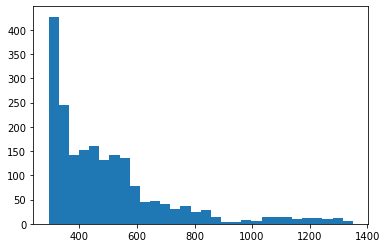

In [180]:
fig, ax = plt.subplots()
G = nx.powerlaw_cluster_graph(2000, 300, 0.1, seed=None)
degrees = np.array(list(dict(G.degree()).values()))
hist, bins, _ = ax.hist(degrees, bins=30)
print_alpha(bins, hist)

### Ex. 2, Ex. 3

α=0.14295273098256958


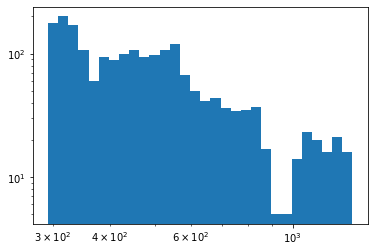

In [181]:
fig, ax = plt.subplots()
logbins = np.geomspace(degrees.min(), degrees.max(), len(bins))
loghist, _, _ = ax.hist(degrees, bins=logbins)
ax.set_xscale('log')
ax.set_yscale('log')
print_alpha(logbins, loghist)

### Ex. 4 

α=3.0022717650048576


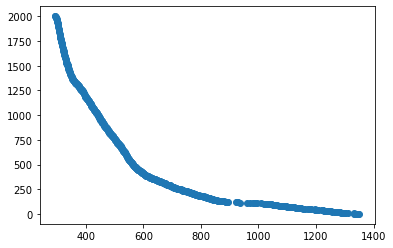

In [182]:
fig, ax = plt.subplots()
degree_counter_sorted = np.array(sorted(Counter(degrees).most_common())[::-1])
degree_counts = degree_counter_sorted[:, 1]
cumsum = np.cumsum(degree_counts)
ax.scatter(degree_counter_sorted[:, 0], cumsum)
print_alpha(np.log10(degree_counter_sorted[:, 0]), np.log10(cumsum), convolve=False)

### Ex. 5
Survival function is, in my opinion, both more readable and it is not affected by noise as much as simple histogram. 

### Ex. 6
Done earlier.

### Ex. 7, 8
$$L(x_1, x_2, ..., x_n, \alpha) = \prod_{i=1}^n \frac{\alpha - 1}{x_{min}} (\frac{x_i}{x_{min}})^{-\alpha} $$
$$ln(L(x_1, x_2, ..., x_n, \alpha)) = nln(\alpha-1) -nln(x_{min}) -\alpha \sum_{i=1}^n ln(\frac{x_i}{x_{min}}) $$
$$\frac{dln(L)}{d\alpha} = \frac{n}{\alpha - 1} - \sum_{i=1}^n ln(\frac{x_i}{x_{min}}) = 0$$


$$\hat{\alpha}_{MLE} = \frac{n}{\sum_{i=1}^n ln(\frac{x_i}{x_{min}})} + 1$$
For known x_min = 1: 
$$\hat{\alpha}_{MLE} = \frac{n}{\sum_{i=1}^n ln(x_i)} + 1$$

In [190]:
def MLE_alpha(x, x_min=None):
    if x_min is None: 
        x_min = x.min()
    return len(x)/np.sum(np.log(x/x_min))  + 1
MLE_alpha(degrees)     

3.171003575672411

### P4.1
Scripts are in file helpers.py

### P4.2


### P4.3

In [205]:
def plot_average_degree_connectivity(G): 
    n_degrees = np.array(sorted(Counter(nx.average_degree_connectivity(G)).most_common()))
    plt.scatter(n_degrees[:, 0], n_degrees[:, 1])
    plt.xlabel('Degree')
    _ = plt.ylabel('Average neightbour degree')

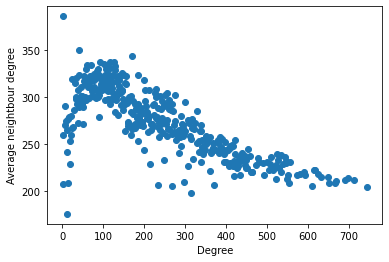

In [207]:
G_real = nx.read_edgelist('bn-mouse_retina_1.edges')
plot_average_degree_connectivity(G_real)

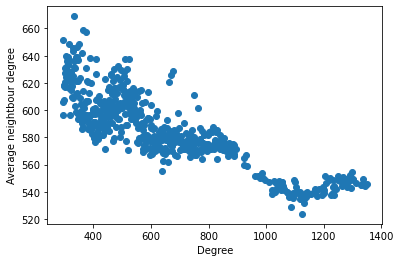

In [208]:
n_degrees = np.array(sorted(Counter(nx.average_degree_connectivity(G)).most_common()))
plot_average_degree_connectivity(G)

### P4.4

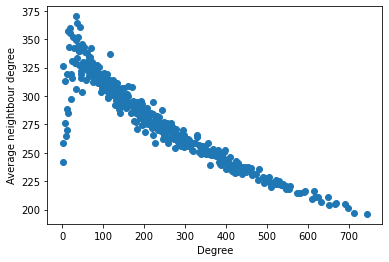

In [220]:
G_real_swap = nx.algorithms.swap.double_edge_swap(G_real, nswap=3000000, max_tries=10000000)
plot_average_degree_connectivity(G_real_swap)

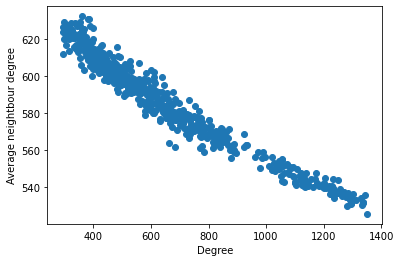

In [221]:
G_swap = nx.algorithms.swap.double_edge_swap(G, nswap=3000000, max_tries=10000000)
plot_average_degree_connectivity(G_swap)

### P4.5
Pearson correlation coefficient can be generally written as: 
\begin{align*}
     \rho _{X,Y}={\frac {{\mathbb {E} } [\,X\,Y\,]-\operatorname {\mathbb {E} } [\,X\,]\operatorname {\mathbb {E} } [\,Y\,]}{{\sqrt {{\mathbb {E} } [\,X^{2}\,]-\left( {\mathbb {E} } [\,X\,]\right)^{2}}}~{\sqrt { {\mathbb {E} } [\,Y^{2}\,]-\left({\mathbb {E} } [\,Y\,]\right)^{2}}}}}
\end{align*}
For our case we can substitute: 
\begin{align*}
     q_k = X 
\end{align*}
\begin{align*}
     q_j = Y 
\end{align*}
\begin{align*}
     \mathbb {E}[\,q_k\,] = \mathbb {E}[\,q_\,]
\end{align*}
\begin{align*}
     \sigma_{q_k} = \sigma_{q_j} 
\end{align*}
and obtain: 
\begin{align*}
     r ={\frac {{\mathbb {E} } [\,q_k\,q_j\,]-\operatorname {\mathbb {E} } [\,q_k\,]^2}{\sigma_{q_k}^2}}
\end{align*}
where: 
\begin{align*}
     \sigma_{q_{k}}^2 = {\mathbb {E} } [\,q_k^2\,] - {\mathbb {E} } [\,q_k\,]^2
\end{align*}
We can calculate first moment by: 
\begin{align*}
     {\mathbb {E} } [\,q_k\,] = \sum_k kP(k) = \sum_k kq_k = \sum_k k \sum_j e_{jk}
\end{align*}
By observing $e_{jk}$ matrix, we can see that we can go through every value of matrix $e_{jk}$. By doing this we count every edge twice, so we have to divide by 2. 
\begin{align*}
     \sum_k k \sum_j e_{jk} = \sum_{k,j}\frac{k+j}{2}e_{jk}
\end{align*}
Instead of going through every value of matrix $e_{jk}$ we can go through every edge in the graph. Additionally, we have to denormalize $e_{jk}$ by multipling by $|M|$.

\begin{align*}
    \sum_{k,j}\frac{k+j}{2}e_{jk} = \frac{1}{2|M|}\sum_{i=1}^{|M|} j_i + k_i
\end{align*}
Where i = 1, 2, ... , M are indices of edges, and $j_i$, $k_i$ are degrees of the vertices attached to $i^{th}$ edge.\\
Similary: 
\begin{align*}
     {\mathbb {E} } [\,q_k^2\,] = \sum_{k,j}\frac{k^2+j^2}{2}e_{jk} = \frac{1}{2|M|}\sum_{i=1}^{|M|} j_i^2 + k_i^2
\end{align*}
Expected value of joint probability distribution is more straightforward but we multiply degrees k and j and we don't divide by 2. 
\begin{align*}
     {\mathbb {E} } [\,q_k\,q_j\,] = \sum_{k,j}k*j*e_{jk} = \frac{1}{|M|}\sum_{i=1}^{|M|} j_i  k_i
\end{align*}
We have everything we need, so we can just substitute for r: 
\begin{align*}
     r ={\frac {{\mathbb {E} } [\,q_k\,q_j\,]-\operatorname {\mathbb {E} } [\,q_k\,]^2}{\sigma_{q_k}^2}} = \frac{\frac{1}{|M|}\sum_{i=1}^{|M|} j_i  k_i -  \frac{1}{2|M|}\sum_{i=1}^{|M|} j_i + k_i}{\frac{1}{2|M|}\sum_{i=1}^{|M|} j_i^2 + k_i^2 - {(\frac{1}{2|M|}\sum_{i=1}^{|M|} j_i + k_i)}^2}
\end{align*}

### P4.6

In [224]:
artificial_coef = nx.degree_assortativity_coefficient(G)
artificial_swap_coef = nx.degree_assortativity_coefficient(G_swap)
artificial_coef, artificial_swap_coef

(-0.09353557401010548, -0.09353557401010548)

In [225]:
real_coef = nx.degree_assortativity_coefficient(G_real)
real_swap_coef = nx.degree_assortativity_coefficient(G_real_swap)
real_coef, real_swap_coef

(-0.2072640396496401, -0.2072640396496401)

### P4.7

In [240]:
def return_stats(G):
    degrees = np.array(list(dict(G.degree()).values()))
    return [0, G.number_of_nodes(), G.number_of_edges(), degrees.mean(), MLE_alpha(degrees), 
            nx.average_shortest_path_length(G), nx.degree_assortativity_coefficient(G)]


In [241]:
graphs = {'real': G_real, 'artificial': G}
df = pd.DataFrame(graphs.keys(), columns=['name'])
df[['is_directed', 'N','E', '⟨k⟩', 'α', 'ℓ', 'r']] = df[['name']].apply(lambda x: return_stats(graphs[x[0]]), result_type='expand', axis=1)

In [242]:
df

,name,is_directed,N,E,⟨k⟩,α,ℓ,r
0,real,0.0,1076.0,90811.0,168.79368,1.206740,1.855596,-0.207264
1,artificial,0.0,2000.0,499613.0,499.61300,3.171004,1.750069,-0.093536


### P4.8

<AxesSubplot:>

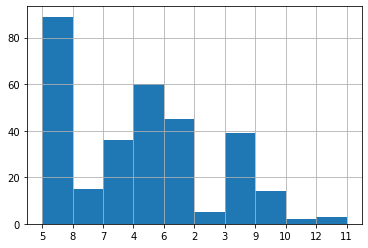

In [248]:
df = pd.read_csv('Erdos_nobel.csv')
df = df[df['ERDÖS NUMBER'] != '?']
df['ERDÖS NUMBER'].hist()

<AxesSubplot:>

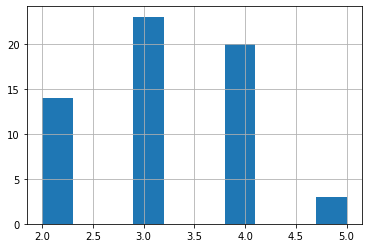

In [249]:
df = pd.read_csv('Erdos_field.csv')
df = df[df['ERDÖS NUMBER'] != '?']
df['ERDÖS NUMBER'].hist()

### P4.9

<AxesSubplot:>

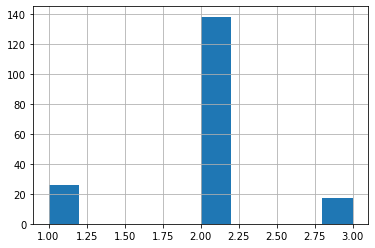

In [251]:
df = pd.read_csv('bacon_oscar.csv')
df['bacon_nr'].hist()